In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import norm
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (9, 6)
plt.rcParams["font.size"] = 18

# just for fun
# plt.xkcd(scale=.5, length=50);

In [7]:
np.random.seed(42)

In [8]:
data = []
underlying_distrib = np.random.normal(-10, 7, 300)
data.extend(np.random.choice(underlying_distrib[:150], 8))
data.extend(np.random.choice(underlying_distrib[-150:], 8))

In [9]:
# data = [-20.31275116, -18.3594738, -18.3553103, -14.18406452, -11.67305,
#         -11.38179997, -11.3761126, -10.6904519, -10.68305023, -10.34148,
#          -8.75222277,  -8.7498553, -6.00130727,   1.45761078,   1.77479,
#           1.78314794,   2.6612791]

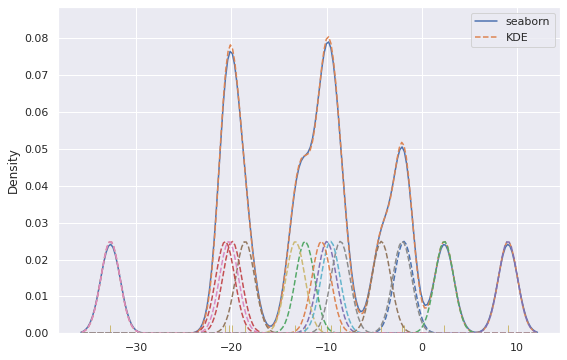

In [15]:
sns.set_theme()
# sns.set_style("dark")

bandwidth=1/np.std(data)

# Compute KDE by hand
samples = 200


# grid points
xmin = min(data) - 3 * width
xmax = max(data) + 3 * width

x = np.linspace(xmin, xmax, samples)

# compute kde
kde = np.zeros(samples)

kdes = []
for val in data:
    kdes.append(norm.pdf(x, loc=val, scale=width))
kde = np.sum(kdes, axis=0)

# normalize
norm_fact = sp.integrate.simps(kde, x)
kde /= norm_fact

# Plot against seaborn kde
ax = sns.kdeplot(data, label="seaborn", bw_method=bandwidth)
ax = sns.lineplot(x=x, y=kde, label="KDE")

for kd in kdes:
    sns.lineplot(x=x, y=kd/norm_fact, ax=ax, palette="Paired")
    
for line in ax.lines[1:]:
    line.set_linestyle("--")
    
    
sns.rugplot(data, ax=ax, palette="Paired")

plt.legend();
plt.show()